In [ ]:
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
from collections import defaultdict
from matplotlib import colormaps as cmap

### <b><font color="blue">Легкая часть</font></b>
### Задача 1

Проверьте, отличается ли средний балл студентов курса Phystech@DataScience за легкую часть задания 3 и 6 весной 2024.

Данные возьмите из [таблицы оценок](https://docs.google.com/spreadsheets/d/1CTOvQrxRpGEJG5vOIVYSPBfUzON5MAsnZeAUj3xxzFA/edit?usp=sharing). Не забудьте визуализировать данные с помощью ядерной оценки плотности (вам поможет функция `sns.kdeplot`) и оценить сдвиг.



Для удобства сделал отдельную табличку по 3 и 6 ДЗ:

In [ ]:
df = pd.read_excel('Ph@DS_HW3_HW6.xlsx')
df.head()

HW_3_E  HW_3_H  HW_6_E  HW_6_H
0       0       0     0.0       0
1       0       0     0.0       0
2      35       0     0.0       0
3      56      60    30.0      46
4      60      30    49.0       0

**Замечание:** При исследовании среднего балла мы будем использовать доли от максимального значения, поскольку количество баллов за эти задания различается (одинаково для легкой части и различается для сложной), т.е. проведем своего рода стандартизацию данных. Следовательно, мы также проведем анализ среднего балла для легкой и сложной частей отдельно.

Подготовка данных:

In [ ]:
HW_3 = pd.DataFrame({
    'HW_3_E': df['HW_3_E'],
    'HW_3_H': df['HW_3_H']
})


HW_3['HW_3_E'] /= max(HW_3['HW_3_E'])
HW_3['HW_3_H'] /= max(HW_3['HW_3_H'])


HW_6 = pd.DataFrame({
    'HW_6_E': df['HW_6_E'],
    'HW_6_H': df['HW_6_H']
})

HW_6['HW_6_E'] /= max(HW_6['HW_6_E'])
HW_6['HW_6_H'] /= max(HW_6['HW_6_H'])

Посмотрим на KDE баллов за 3 и 6 ДЗ:

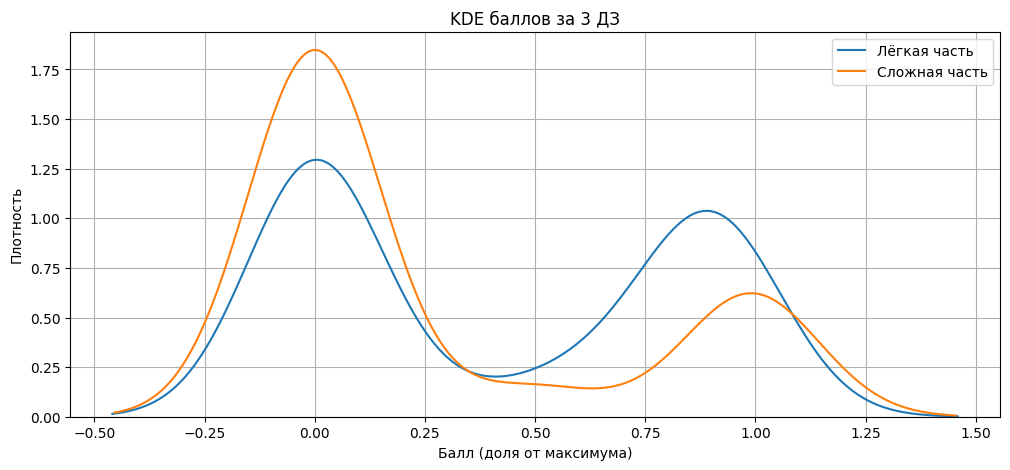

In [ ]:
plt.figure(figsize = (12, 5))

sns.kdeplot(data = HW_3, x = 'HW_3_E', label = 'Лёгкая часть')
sns.kdeplot(data = HW_3, x = 'HW_3_H', label = 'Сложная часть')

plt.title('KDE баллов за 3 ДЗ')

plt.xlabel('Балл (доля от максимума)')
plt.ylabel('Плотность')

plt.grid()
plt.legend()

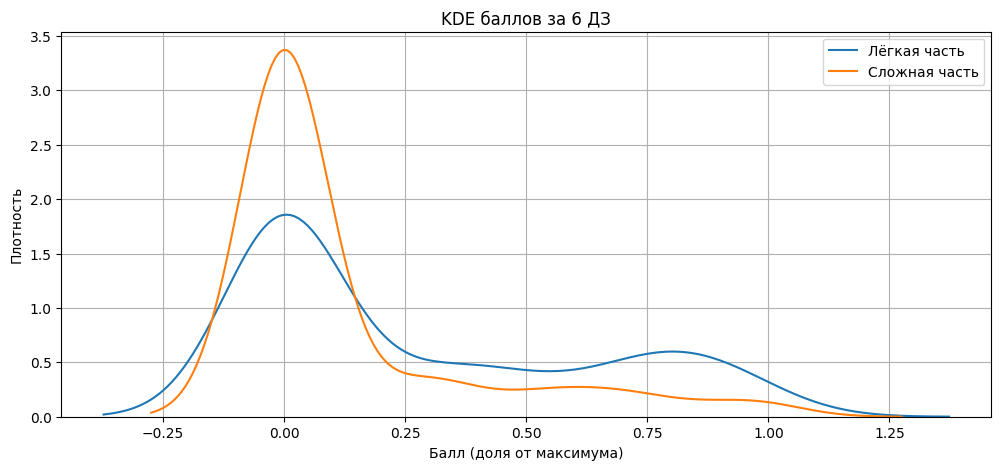

In [ ]:
plt.figure(figsize = (12, 5))

sns.kdeplot(data = HW_6, x = 'HW_6_E', label = 'Лёгкая часть')
sns.kdeplot(data = HW_6, x = 'HW_6_H', label = 'Сложная часть')

plt.title('KDE баллов за 6 ДЗ')

plt.xlabel('Балл (доля от максимума)')
plt.ylabel('Плотность')

plt.grid()
plt.legend()

Давайте также учтем, что есть студенты, которые не делают ДЗ. Давайте их кокнем, потом шлепнем, т.е. посмотрим на распределение данных без нулей за легкую и сложную часть в обоих ДЗ:

In [ ]:
HW_3_without_null = HW_3[(HW_3['HW_3_E'] != 0) | (HW_3['HW_3_H'] != 0) | (HW_6['HW_6_E'] != 0) | (HW_6['HW_6_H'] != 0)]
HW_6_without_null = HW_6[(HW_3['HW_3_E'] != 0) | (HW_3['HW_3_H'] != 0) | (HW_6['HW_6_E'] != 0) | (HW_6['HW_6_H'] != 0)]

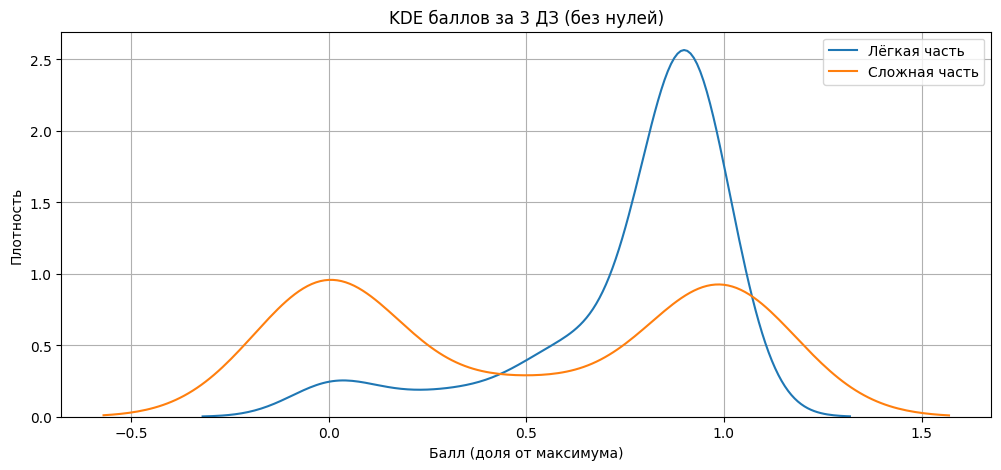

In [ ]:
plt.figure(figsize = (12, 5))

sns.kdeplot(data = HW_3_without_null, x = 'HW_3_E', label = 'Лёгкая часть')
sns.kdeplot(data = HW_3_without_null, x = 'HW_3_H', label = 'Сложная часть')

plt.title('KDE баллов за 3 ДЗ (без нулей)')

plt.xlabel('Балл (доля от максимума)')
plt.ylabel('Плотность')

plt.grid()
plt.legend()

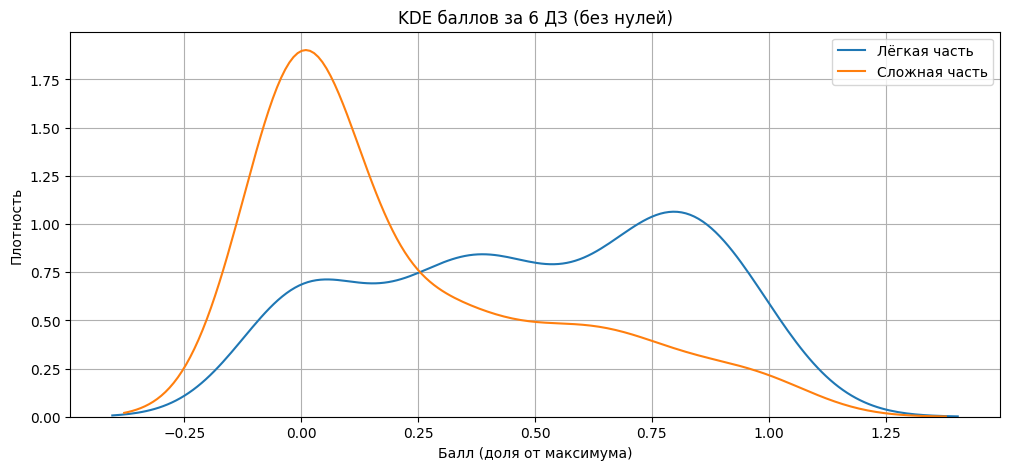

In [ ]:
plt.figure(figsize = (12, 5))

sns.kdeplot(data = HW_6_without_null, x = 'HW_6_E', label = 'Лёгкая часть')
sns.kdeplot(data = HW_6_without_null, x = 'HW_6_H', label = 'Сложная часть')

plt.title('KDE баллов за 6 ДЗ (без нулей)')

plt.xlabel('Балл (доля от максимума)')
plt.ylabel('Плотность')

plt.grid()
plt.legend()

Теперь общий график:

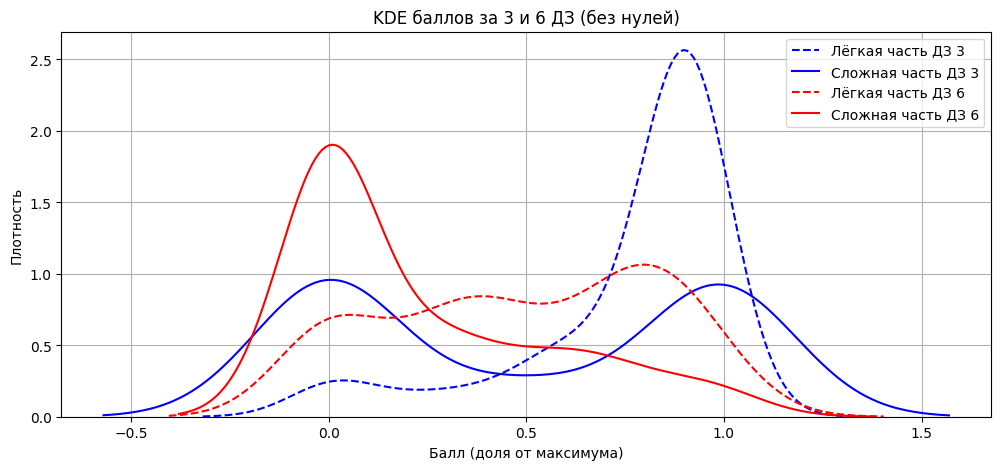

In [ ]:
plt.figure(figsize = (12, 5))

sns.kdeplot(data = HW_3_without_null, x = 'HW_3_E', label = 'Лёгкая часть ДЗ 3', color = 'blue', linestyle = '--')
sns.kdeplot(data = HW_3_without_null, x = 'HW_3_H', label = 'Сложная часть ДЗ 3', color = 'blue')
sns.kdeplot(data = HW_6_without_null, x = 'HW_6_E', label = 'Лёгкая часть ДЗ 6', color = 'red', linestyle = '--')
sns.kdeplot(data = HW_6_without_null, x = 'HW_6_H', label = 'Сложная часть ДЗ 6', color = 'red')

plt.title('KDE баллов за 3 и 6 ДЗ (без нулей)')

plt.xlabel('Балл (доля от максимума)')
plt.ylabel('Плотность')

plt.grid()
plt.legend()

Теперь посчитаем p-value и проверим гипотезу равенства средних:

In [ ]:
_, p_val_E = sps.ttest_rel(HW_3_without_null['HW_3_E'], HW_6_without_null['HW_6_E'])
_, p_val_H = sps.ttest_rel(HW_3_without_null['HW_3_H'], HW_6_without_null['HW_6_H'])

print(f'Для лёгкой части p_value = {p_val_E.round(5)}, значит отвергаем гипотезу равенства средних \n')
print(f'Для сложной части p_value = {p_val_H.round(5)}, значит отвергаем гипотезу равенства средних \n')

Для лёгкой части p_value = 0.0, значит отвергаем гипотезу равенства средних 

Для сложной части p_value = 0.0, значит отвергаем гипотезу равенства средних 



Сделайте общий вывод по задаче.

**Вывод:**

Для легкой и сложной части гипотеза равенства средних была отвергнута. По KDE это примерно и было видно.

### Задача 2
Рассмотрите таблицу с оценками по какому-либо курсу с несколькими семинарскими группами. Выберите свою группу и еще какую-нибудь. Проверьте гипотезу о том, что средний балл не отличается между семинарскими группами. Не забывайте про визуализацию.

Сделайте выводы.

**Данные:**

У меня есть сосед, который очень любит электронику, фотонику и нанотехнологии. Как-то раз, год назад, они всем курсом успешно написали экзаменационную контрольную работу по фотонике. Давайте же посмотрим, верна ли гипотеза о равенстве средних баллов двух нехависимых групп.

In [ ]:
df = pd.read_excel('electronika_res.xlsx')
group_1 = df['Б04-105']
group_2 = df['Б04-107']

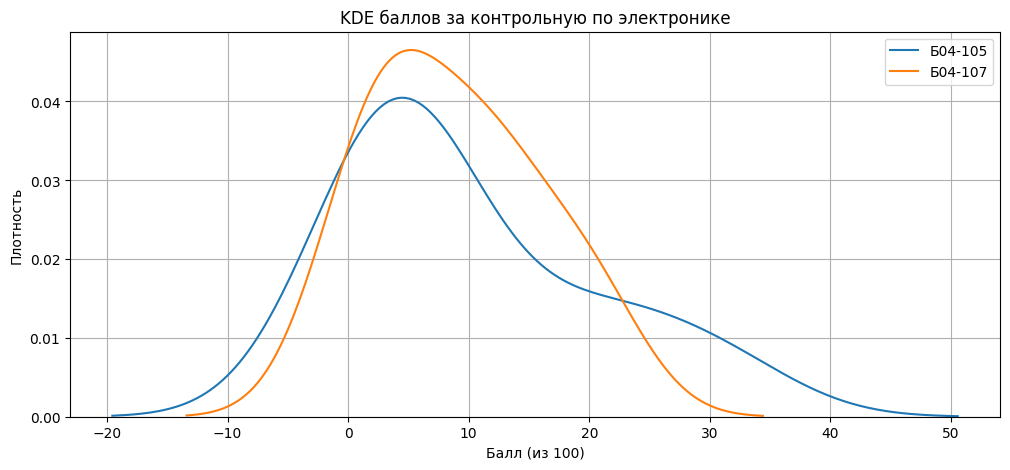

In [ ]:
plt.figure(figsize = (12, 5))

sns.kdeplot(data = group_1, label = 'Б04-105')
sns.kdeplot(data = group_2, label = 'Б04-107')

plt.title('KDE баллов за контрольную по электронике')

plt.xlabel('Балл (из 100)')
plt.ylabel('Плотность')

plt.grid()
plt.legend()

In [ ]:
_, p = sps.ttest_ind(group_1, group_2, equal_var = False)
print(f'p_value = {p.round(5)}, значит не отвергаем гипотезу равенства средних \n')

p_value = 0.76583, значит не отвергаем гипотезу равенства средних 



**Вывод:**

При проведении статистического анализа я рассматривал выборки как независимые, так как в разных группах учились разные студенты, а контрольная работа была написана всеми одновременно. Гипотеза о равенстве средних значений не была отвергнута, что также ясно подтверждалось визуализацией функции плотности распределения (KDE).

### Задача 3


Предположим, что вы разработали лекарство от коронавируса. Перед применением оно обязательно должно пройти клинические испытания. Для начала было разрешено проверить лекарство на двух независимых группах по 10 человек. Одна группа принимает плацебо, другая &mdash; ваш препарат. Большее количество пациентов на первом этапе брать не разрешают &mdash; слишком велики риски отрицательного результата.

Для каждого пациента измерялось количество дней от приема препарата до выздоровления. Получились следуюшие результаты:

In [ ]:
x = np.array([6, 16, 8, 13, 9, 4, 7, 10, 3, 14])  # плацебо
y = np.array([5, 10, 3, 1, 5, 3, 19, 2, 2, 5])  # лекарство

Что вы можете сказать на основе этих результатов?
* Лекарство эффективнее, подтверждается статистическими методами;
* Наверное, лекарство эффективнее, но статистическими методами это пока не подтверждено, нужно продолжить эксперимент. Подумайте, как обосновать необходимость продолжение эксперимента;
* По результатам эксперимента нельзя сделать какой-либо вывод. Стоит ли продолжать эксперименты? Если да, то четко это обоснуйте;
* Лекарство неэффективно, нужно немедленно прекращать эксперимент.

In [ ]:
_, p = sps.ttest_ind(x, y, equal_var = False)
print(f'p_value = {p.round(5)}, значит не отвергаем нулевую гипотезу')

p_value = 0.12613, значит не отвергаем нулевую гипотезу


**Выводы:**

Такое значение p-value означает, что у нас нет достаточных доказательств для того, чтобы сказать, что лекарство эффективнее плацебо. Однако, это также не означает, что лекарство неэффективно.

На основе этих результатов, наиболее подходящим ответом будет то, что, наверное, лекарство эффективнее, но статистическими методами это пока не подтверждено, нужно продолжить эксперимент.

**Обоснование:**

1. Использовалась небольшая выборка из 10 человек в каждой группе, что может привести к недостаточной статистической мощности.

2. Несмотря на отсутствие статистической значимости, наблюдается тенденция в сторону лучшего выздоровления у пациентов, принимающих лекарство. Увеличение размера выборки может помочь в выявлении более явных различий.

3. Больший объем данных может улучшить точность и достоверность результатов, а также помочь исключить влияние случайных факторов.

4. Дополнительные исследования могут включать контроль за другими факторами, такими как возраст, пол, состояние здоровья и прочие факторы, которые могут влиять на эффективность лекарства.

### Задача 4

Пусть $X=(X_1, \dots, X_n)$, $Y=(Y_1, \dots, Y_m)$ - независимые выборки из нормального распределения.

* $X_1, ..., X_n \sim \mathcal{N}(a_1, \sigma_1^2)$,

* $Y_1, ..., Y_m \sim \mathcal{N}(a_2, \sigma_2^2)$.

C помощью t-test проверяется пара гипотез

$$\mathsf{H}_0\colon EX_1 = 0 \text{ vs } \mathsf{H}_1\colon EX_1 < 0$$

$$\mathsf{H}_0\colon EY_1 = 0 \text{ vs } \mathsf{H}_1\colon EY_1 > 0$$

Оцените реальный уровень значимости процедуры, если обе гипотезы проверяются на уровне $\alpha=0.05$. Совпадает ли он с $\alpha$? Предложите способ сделать так, чтобы он был равен $\alpha$.

**Решение:**

t-тест для X: $$t_X = \frac{\overline{X} - a_1}{S_X/\sqrt{n}} = \sqrt{n}\frac{\overline{X} - a_1}{S_X}$$

t-тест для Y: $$t_Y = \frac{\overline{Y} - a_2}{S_Y/\sqrt{m}} = \sqrt{m}\frac{\overline{Y} - a_2}{S_Y}$$

Отторгаем гипотезу, если:

$t_x < z_{\alpha_x}$ - так как левосторонняя альтернатива

$t_y > z_{1 - \alpha_y}$ - так как правосторонняя альтернатива

Тогда:

$P(\text{хотя бы одну верную гипотезу}) = P(\text{отвергнуть верную с } \alpha_x) + P(\text{отвергнуть верную с } \alpha_y)  - \\  - P(\text{отвергнуть верную с } \alpha_x, с \; \alpha_y) = \alpha_x + \alpha_y - \alpha_x\alpha_y = |\alpha_x = \alpha_y = \alpha = 0,05| = 2\alpha - \alpha^2 \approx 2\alpha$

$\Rightarrow$ накапливается ошибка I рода

Для решения этой проблемы сделаем следующее:

$\alpha_x = \alpha_y = \frac{\alpha}{2} = 0,025$

Т.о. итоговый уровень значимости будет равен 0,05.

### <b><font color="orange">Сложная часть</font></b>

### Задача 5


#### Профиль биология


Скачаем [данные](https://www.kaggle.com/ruslankl/mice-protein-expression) об экспрессии генов различных белков в головном мозге белых мышей.

В этом датасете представлены уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов мышей, некоторые из которых страдают синдромом Дауна, а некоторые были подвержены контекстному обусловливанию страха, задачи, используемой для оценки ассоциативного обучения.

Данные содержат информацию о 38 контрольных мышей и 34 трисомных мышей (синдром Дауна), то есть всего 72 мышки. Проведено 15 измерений каждого белка для каждой мышки, то есть каждой мыши соответствует несколько записей в таблице.

Загрузим данные и посмотрим на начало таблицы. Всего мы имеем 82 колонки, в большинстве их которых содержатся вещественные данные (уровни экспрессии 77 белков). Остальные колонки содержат категориальные данные (с небольшим числом значений).

In [ ]:
path = '/content/Data_Cortex_Nuclear.csv'
data = pd.read_csv(path)
data.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

Выведем описательные статистики по вещественным параметрам.

In [ ]:
data.describe()

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249362     0.251640     0.049383     0.347293     0.933100   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288121     0.473361     0.287444     2.057411     3.155678   
50%       0.366378     0.565782     0.316564     2.296546     3.760855   
75%       0.487711     0.698032     0.348197     2.528481     4.440011   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000  ...   
mean      0.233168     0.181846     3.537109     0.212574     1.428682  ...   
std       0.041634     0.027042     1.295169     0.032587     0.466904  ...   
min       0.063236     0.064043     1.343998     0.112812     0.429032  ...   
25%       0.205755     0.164595     2.479834     0.190823     1.203665  ...   
50%       0.231177     0.182302     3.326520     0.210594     1.355846  ...   
75%       0.257261     0.197418     4.481940     0.234595     1.561316  ...   
max       0.539050     0.317066     7.464070     0.306247     6.113347  ...   

             SHH_N       BAD_N      BCL2_N        pS6_N      pCFOS_N  \
count  1080.000000  867.000000  795.000000  1080.000000  1005.000000   
mean      0.226676    0.157914    0.134762     0.121521     0.131053   
std       0.028989    0.029537    0.027417     0.014276     0.023863   
min       0.155869    0.088305    0.080657     0.067254     0.085419   
25%       0.206395    0.136424    0.115554     0.110839     0.113506   
50%       0.224000    0.152313    0.129468     0.121626     0.126523   
75%       0.241655    0.174017    0.148235     0.131955     0.143652   
max       0.358289    0.282016    0.261506     0.158748     0.256529   

             SYP_N   H3AcK18_N      EGR1_N    H3MeK4_N       CaNA_N  
count  1080.000000  900.000000  870.000000  810.000000  1080.000000  
mean      0.446073    0.169609    0.183135    0.205440     1.337784  
std       0.066432    0.059402    0.040406    0.055514     0.317126  
min       0.258626    0.079691    0.105537    0.101787     0.586479  
25%       0.398082    0.125848    0.155121    0.165143     1.081423  
50%       0.448459    0.158240    0.174935    0.193994     1.317441  
75%       0.490773    0.197876    0.204542    0.235215     1.585824  
max       0.759588    0.479763    0.360692    0.413903     2.129791  

[8 rows x 77 columns]

Количество записей по генотипам:

In [ ]:
data.Genotype.value_counts()

Genotype
Control    570
Ts65Dn     510
Name: count, dtype: int64

В начале исследования полезно посмотреть на данные визуально. Посмотрим на зависимость уровней экспрессии разных белков друг от друга. Визуализируйте данные в первых десяти колонках в двумерных проекциях, используя `sns.pairplot`.

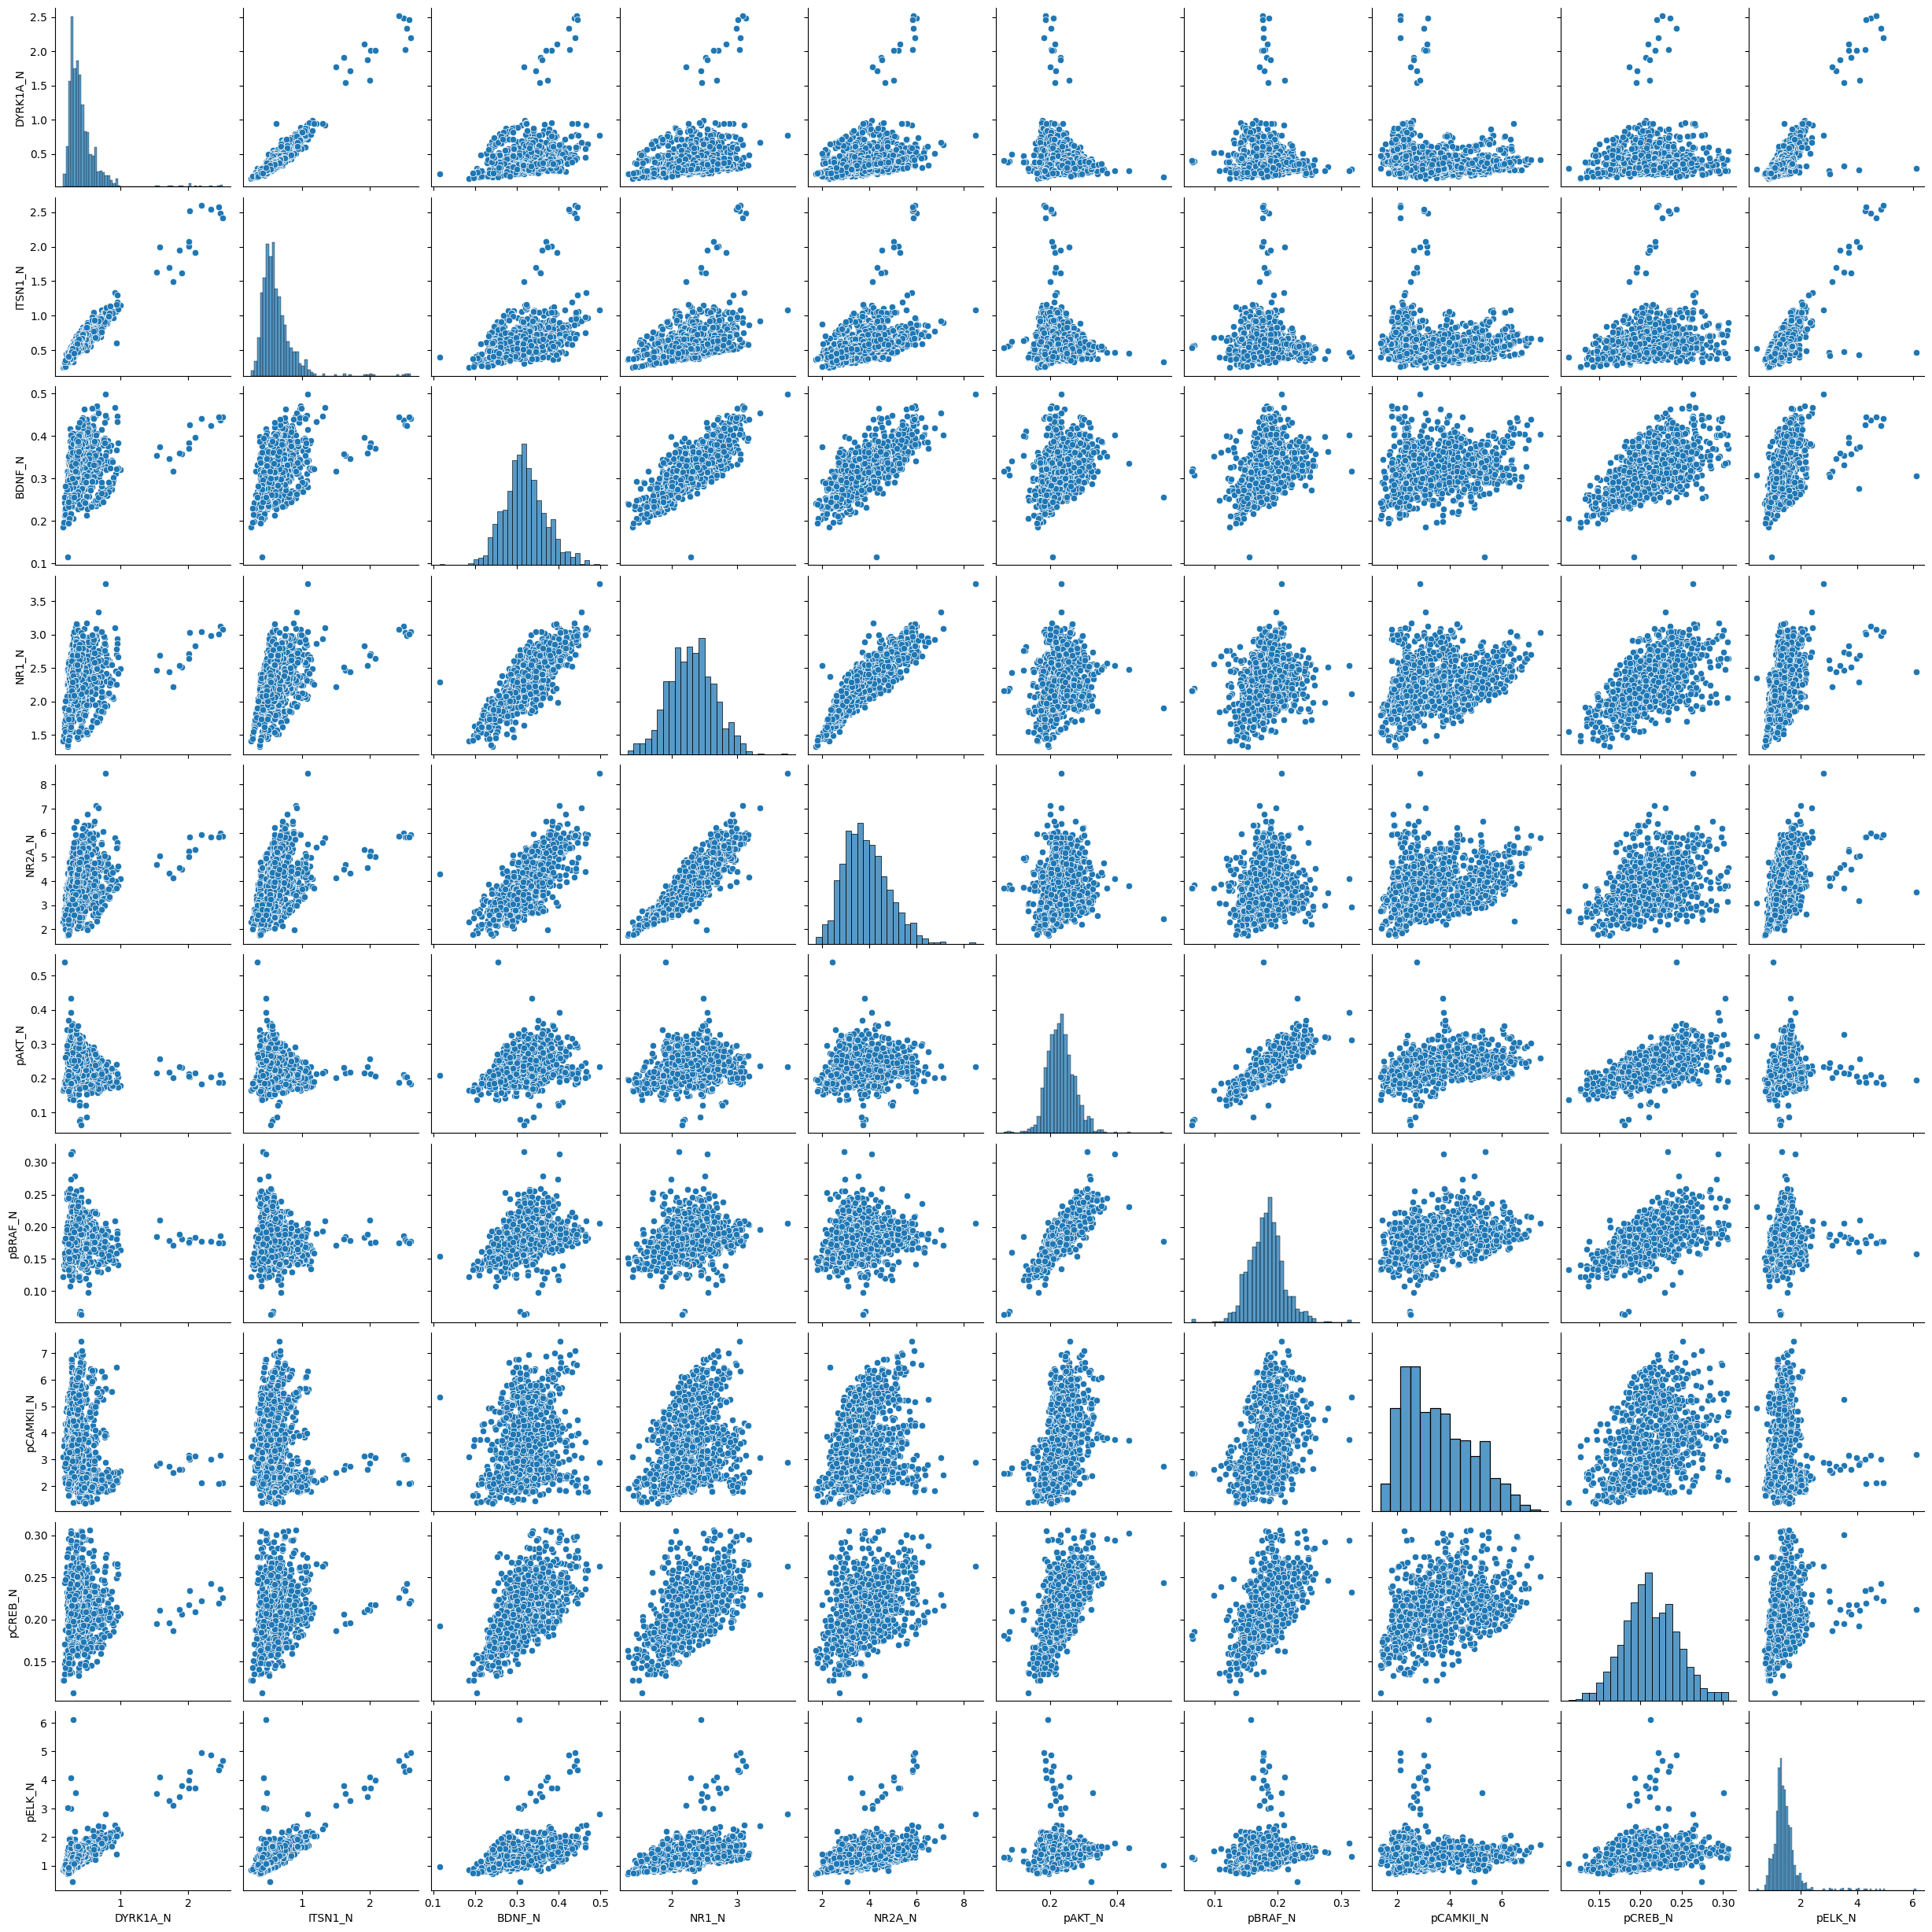

In [ ]:
sns.pairplot(data[data.columns[1:11]])

Визуализируйте двумерные проекции данных и гистограммы с использованием `sns.PairGrid` отдельно по генотипам для 10 признаков. Используйте `hue='Genotype'` при вызове `sns.PairGrid`. По параметру `hue`  происходит разделение датасета, подробнее можно почитать в [документации](https://seaborn.pydata.org/generated/seaborn.PairGrid.html).

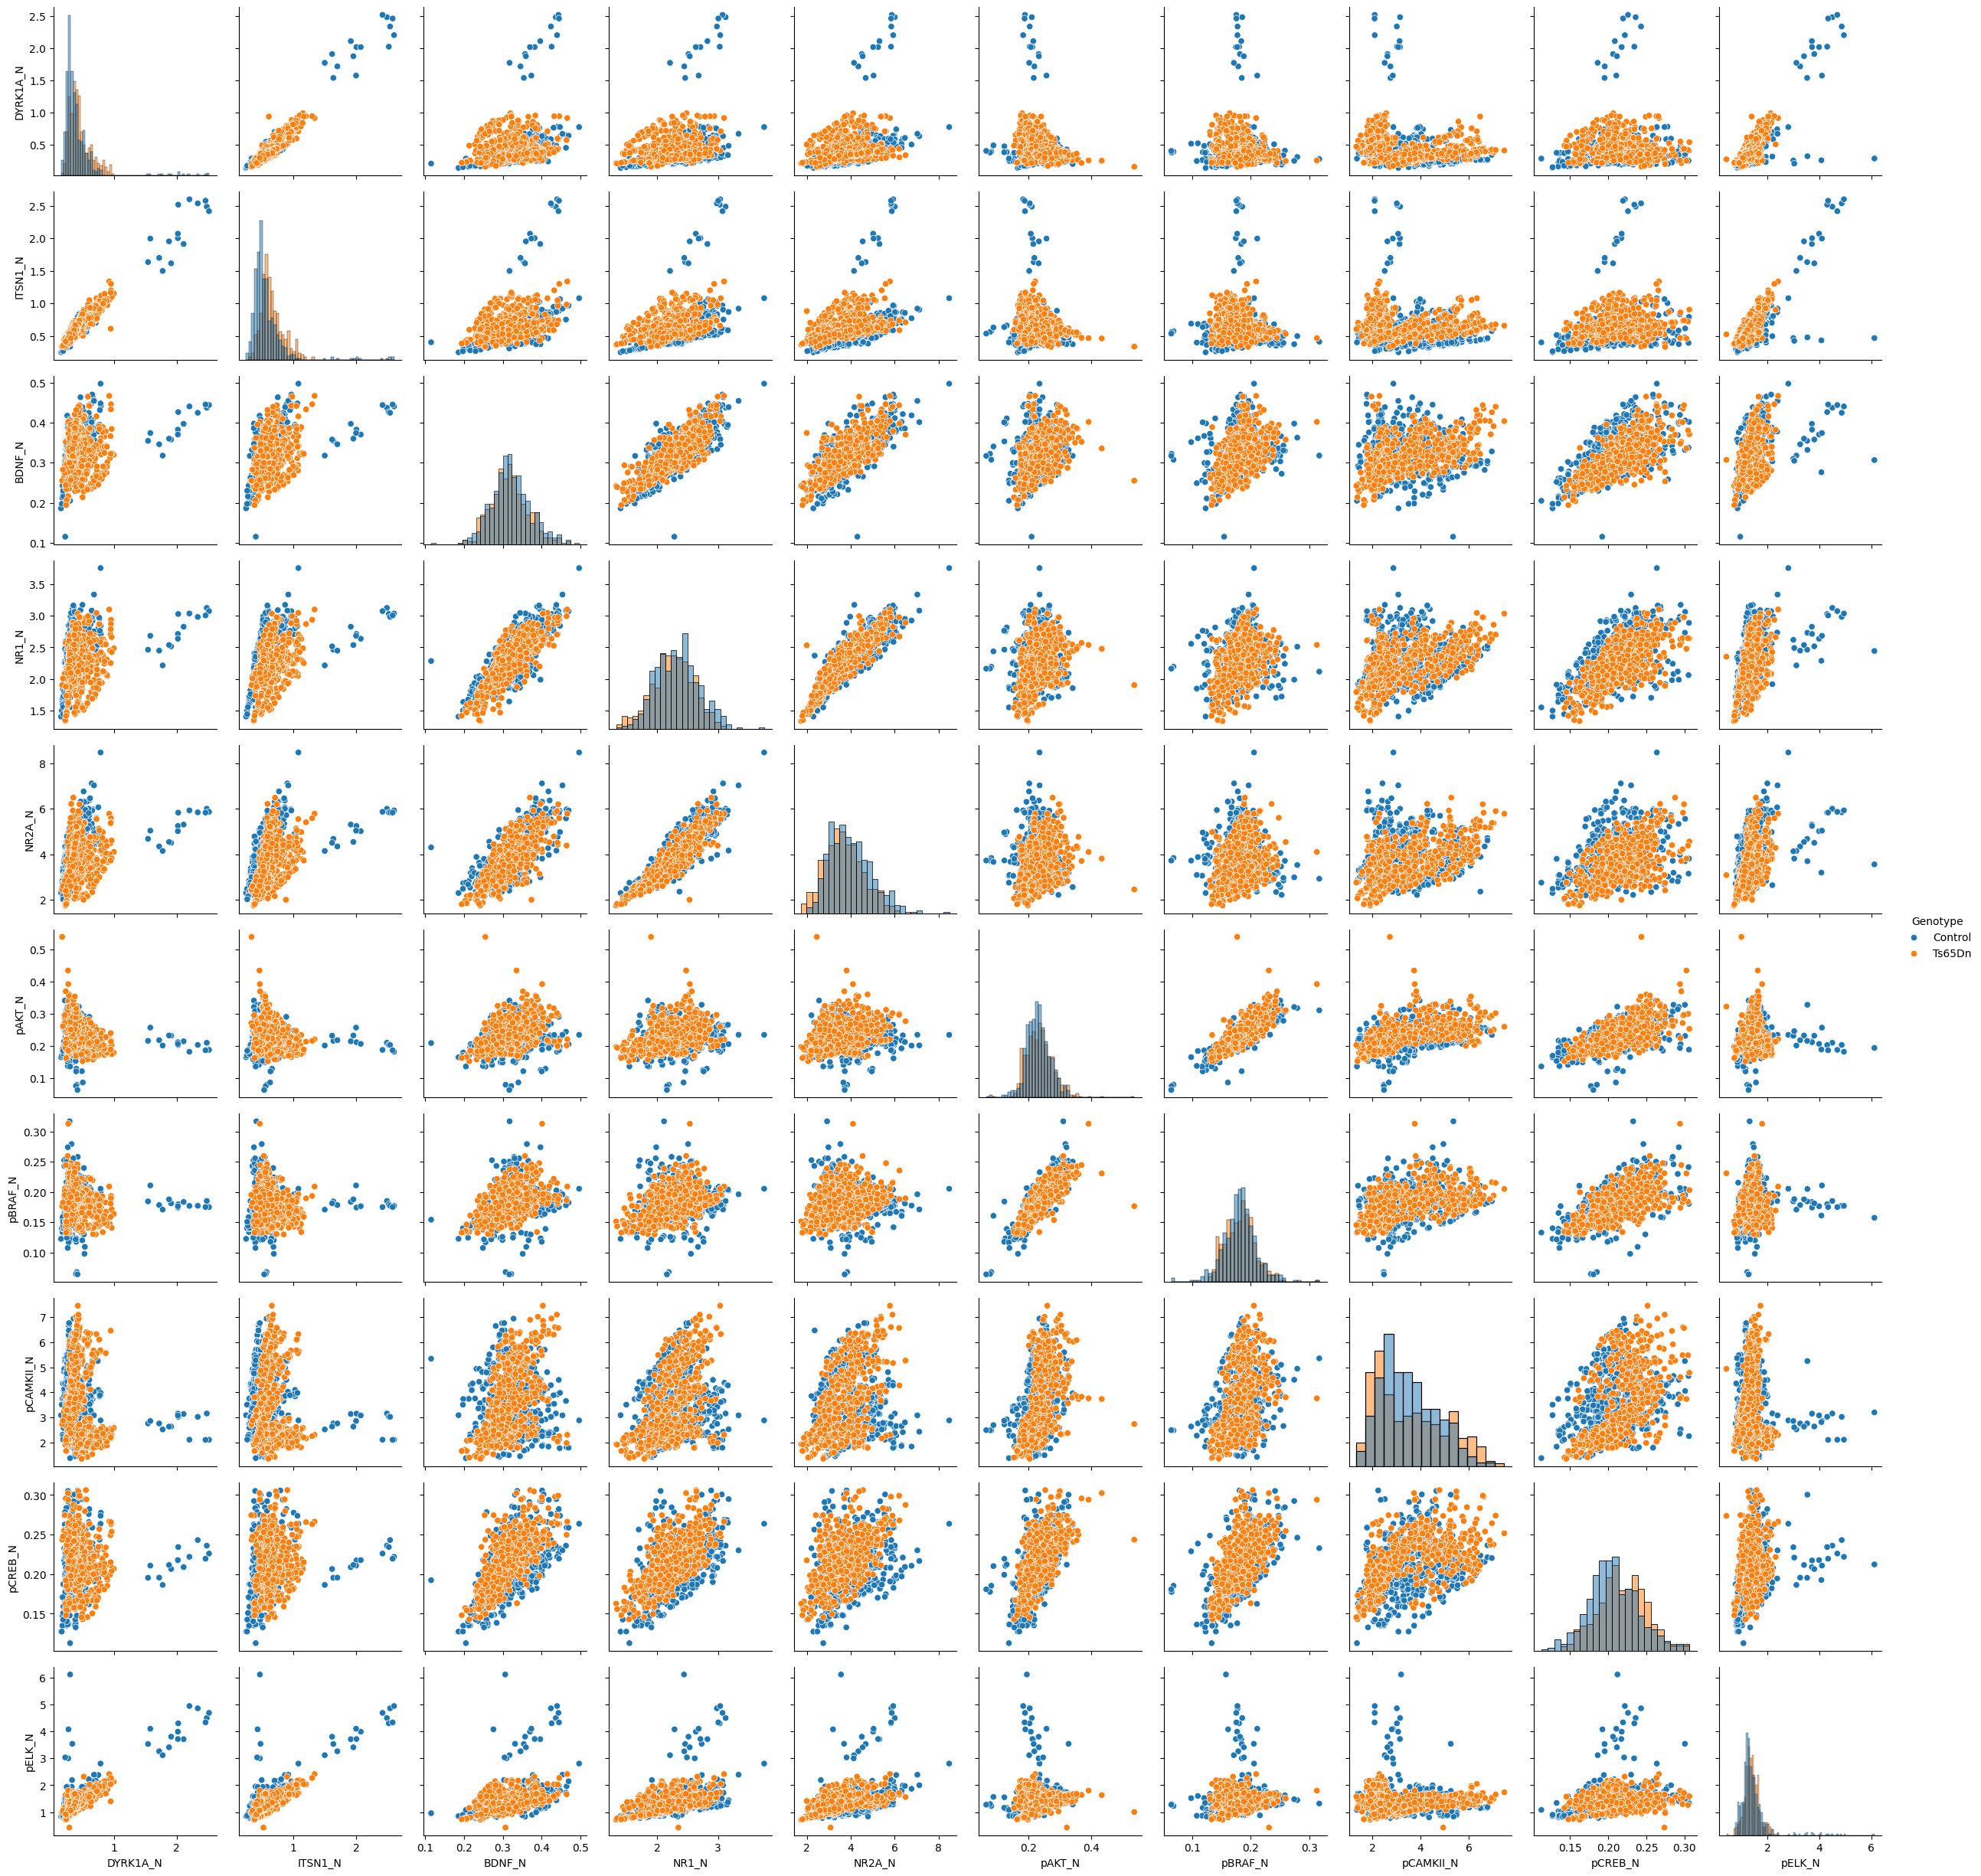

In [ ]:
f = sns.PairGrid(data, hue = 'Genotype', vars = data.columns[1:11])

f.map_diag(sns.histplot)
f.map_offdiag(sns.scatterplot)
f.add_legend()

##### 1. Зависимость распределения DYRK1A_N от генотипа

Проверьте гипотезу о равенстве средних с использованием критерия Стьюдента.  В реальных исследованиях нужно использовать конкретную альтернативу.

Сделайте выводы.

In [ ]:
# посмотрим какие генотипы представлены в датасете
set(data['Genotype'])

{'Control', 'Ts65Dn'}

In [ ]:
control = data['DYRK1A_N'][data['Genotype'] == 'Control'].dropna()
Ts65Dn = data['DYRK1A_N'][data['Genotype'] == 'Ts65Dn'].dropna()
_, p = sps.ttest_ind(control, Ts65Dn, alternative = 'less', nan_policy = 'omit')
print(f'p_value = {p.round(5)}')

p_value = 0.00163


**Вывод:**

Посмотрел на визуализации. По гистограмме видно, что среднее для контрольного генотипа вроде бы меньше, чем у Ts65DN. Поэтому при исследовании выбрал левостороннюю альтернативу.

P-value показал, что так и есть. Гипотезу равенства средних отвергаем при альтернативе, что среднее для контроля меньше.

Посчитайте реализацию доверительного интервала величины сдвига.


Я человек ленивый, поэтому, недолго думая, решил найти статистическую библиотеку, где реализован подсчёт доверительных интервалов. Ссылка на используемую библиотеку: https://pingouin-stats.org/build/html/generated/pingouin.ttest.html

Функция pingouin.ttest возвращает таблицу с данными, где p-val это p-value, а CI95% -- доверительный интервал величины сдвига.

In [ ]:
#!pip install pingouin

In [ ]:
import pingouin as pg

pg.ttest(control, Ts65Dn, alternative = 'less')

T         dof alternative     p-val          CI95%   cohen-d  \
T-test -3.037203  924.283224        less  0.001227  [-inf, -0.02]  0.179993   

         BF10     power  
T-test  12.72  0.903493

**Вывод:**

Фактически, верхняя граница интервала достаточно близка к нулю, поэтому мы отвергаем гипотезу с некоторой осторожностью.

##### 2. Зависимость распределения  BDNF_N от генотипа


Проверьте гипотезу о равенстве средних с использованием критерия Стьюдента при различных альтернативах, посчитайте оценку сдвига и доверительный интервал. Сделайте выводы.

In [ ]:
control = data['BDNF_N'][data['Genotype'] == 'Control']
Ts65Dn = data['BDNF_N'][data['Genotype'] == 'Ts65Dn']

l =  pg.ttest(control, Ts65Dn, alternative = 'less')
g =  pg.ttest(control, Ts65Dn, alternative = 'greater')
ts = pg.ttest(control, Ts65Dn, alternative = 'two-sided')

In [ ]:
l # Левосторонняя альтернатива

T         dof alternative     p-val         CI95%   cohen-d  \
T-test  1.445432  1071.33653        less  0.925686  [-inf, 0.01]  0.087937   

         BF10    power  
T-test  0.383  0.00102

In [ ]:
g # Правосторонняя альтернатива

T         dof alternative     p-val        CI95%   cohen-d  \
T-test  1.445432  1071.33653     greater  0.074314  [-0.0, inf]  0.087937   

         BF10     power  
T-test  0.383  0.418673

In [ ]:
ts # Двусторонняя альтернатива

T         dof alternative     p-val         CI95%   cohen-d  \
T-test  1.445432  1071.33653   two-sided  0.148629  [-0.0, 0.01]  0.087937   

         BF10     power  
T-test  0.192  0.301598

**Вывод:**

При любой альтернативе мы не можем опровергнуть гипотезу о равенстве средних. Это ясно, поскольку значение 0 входит во все указанные доверительные интервалы.

Как связаны доверительные интервалы с проверкой гипотез? Подтверждается ли это в данном примере?

**Ответ:**

В зависимости от выбранной альтернативы изменяются пределы доверительного интервала. Сам интервал указывает на диапазон значений, в котором с вероятностью 95% не находится истинное значение $\theta_0$ в случае отклонения нулевой гипотезы. Если $\theta_0$ попадает в этот интервал, то мы не можем отвергнуть гипотезу. В общем, доверительный интервал просто более информативен, чем p-value, поскольку он позволяет определить диапазон, в котором мы доверяем нашей гипотезе.

#### Профиль физика

Скачайте [данные](https://www.kaggle.com/datasets/naharrison/particle-identification-from-detector-responses?resource=download) моделирования неупругого рассеяния протонов и электронов. В датасете представлены 4 разных вида частиц (частицы одного вида имеют одинаковый id).

In [ ]:
path = <...>
data = pd.read_csv(path)
data['id'].unique()

Постройте гистограммы признаков для каждого вида частиц.

In [ ]:
<...>


Для каждой частицы посчитайте среднее значение для каждой колонки с помощью `data.groupby`

In [ ]:
<...>

Для частиц и признаков с похожими средними значениями с помощью критерия Стьюдента проверьте гипотезу о равенстве средних. Не забудьте о МПГ.

Также посчитайте реализацию доверительного интервала величины сдвига. Как связаны доверительные интервалы с проверкой гипотез? Вам могут помочь прошлые лекции. Подтверждается ли это в данном примере?


In [ ]:
<...>

**Ответ:** <...>

Сделайте вывод, по каким измерениям частицы тяжелее/проще всего различить.

**Вывод:** <...>

Студенты профиля **химия** могут решать любую из задач.



### Задача 6

Это задание является продолжением задачи 5 из прошлого домашнего задания. Здесь вам необходимо наглядно сравнить два критерия из предыдущей задачи. Для этого прооделайте все пункты для обоих критериев. Обязательно подписывайте какой график к какому критерию относится.


**1.** **Оцените реальный уровень значимости** критерия для размеров выборки $1 \leqslant n \leqslant 50$ и визуализируйте полученную зависимость.

In [ ]:
def wald_test(sample, theta, estimation_theta, estimation_sigma, alternative = 'two_sided'):
    """
    param sample: реализация выборки
    param theta: истинное значение параметра
    param estimation_theta: оценка параметра
    param estimation_sigma: оценка асимптотической дисперсии
        оценки estimation_sigma
    param alternative: вид альтернативной гипотезы,
        может принимать одно из значений 'two_sided', 'less', 'greater'

    return statistic
    return p_value
    return conf_int - доверительный интервал
    """

    alpha = 0.05
    n = sample.shape[-1]

    if alternative == 'two_sided':
        z = sps.norm.ppf(1 - alpha/2)
        statistic = np.abs(np.sqrt(n) * (estimation_theta - theta) / estimation_sigma)
        conf_int = ((estimation_theta - z * estimation_sigma / np.sqrt(n)).round(3), (estimation_theta + z * estimation_sigma / np.sqrt(n)).round(3))
        p_value = 2 * sps.norm.sf(statistic)

    elif alternative == 'less':
        z = sps.norm.ppf(alpha)
        statistic = np.sqrt(n) * (estimation_theta - theta) / estimation_sigma
        conf_int = (-np.inf, (estimation_theta - z * estimation_sigma / np.sqrt(n)).round(3))
        p_value = sps.norm.cdf(statistic)

    elif alternative == 'greater':

        z = sps.norm.ppf(1 - alpha)
        statistic = np.sqrt(n) * (estimation_theta - theta) / estimation_sigma
        conf_int = ((estimation_theta - z * estimation_sigma / np.sqrt(n)).round(3), np.inf)
        p_value = sps.norm.sf(statistic)

    return statistic.round(7), p_value.round(5), conf_int

<ipython-input-41-059ecb676c10>:10: RuntimeWarning: invalid value encountered in divide
  Ts = np.sqrt(np.arange(sample_size)) * means / S
<ipython-input-35-4c92e4351358>:34: RuntimeWarning: divide by zero encountered in divide
  statistic = np.sqrt(n) * (estimation_theta - theta) / estimation_sigma


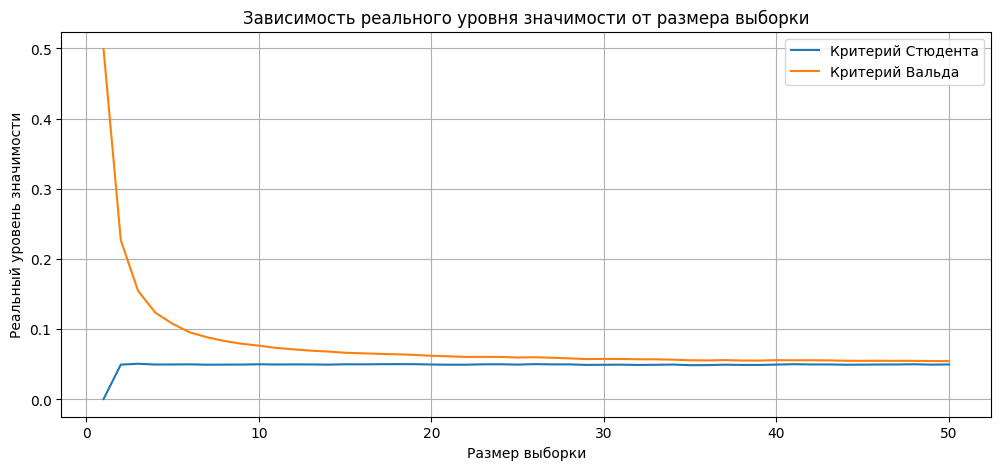

In [ ]:
alpha = 0.05
sample_size = 50
sample_count = 100000

X = sps.norm(loc = 0).rvs(size = (sample_count, sample_size))

means = np.cumsum(X, axis = 1)/(np.arange(sample_size) + 1)
S = np.sqrt(np.cumsum(np.square(X), axis = 1)/(np.arange(sample_size) + 1) - np.square(means))

Ts = np.sqrt(np.arange(sample_size)) * means / S

trust = []
trust_n = []


z_t = sps.t(df = np.arange(sample_size)).ppf(1 - alpha)
z_n = sps.norm.ppf(1 - alpha)

for i in range(sample_size):
    w = wald_test(X[:, :i+1], 0, means[:, i], S[:, i], alternative = 'greater')[0]
    trust_n.append(np.mean(w > z_n))
    trust.append(np.mean(Ts[:, i] > z_t[i]))


plt.figure(figsize = (12, 5))
plt.plot(np.arange(sample_size)+1, trust, label='Критерий Стюдента')
plt.plot(np.arange(sample_size)+1, trust_n, label='Критерий Вальда')

plt.title('Зависимость реального уровня значимости от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('Реальный уровень значимости')

plt.legend()
plt.grid()
plt.show()

**Вывод:**

При небольших объемах выборки (до 10-20) рекомендуется использовать критерий Стьюдента, поскольку асимптотический критерий проявляет недостаточную точность, что приводит к значительному превышению уровня значимости над $\alpha$. В то время как для критерия Стьюдента уровень значимости сразу хороший и не превышает установленного уровня $\alpha$.

**2.** Для значений $n \in \{5, 15, 30, 50, 100\}$ **оцените функцию мощности критерия** для значений $\theta \in (0, 5)$ по сетке с шагом 0.25 по методу Монте-Карло. Визуализируйте полученные зависимости. Посчитайте также мощность критерия по асимптотической формуле, полученной на лекции, и сравните с оценкой мощности методом Монте-Карло. Учтите, что асимптотическая формула содержит $n$, поэтому для нее тоже должно быть три зависимости.

In [ ]:
ns = [5, 15, 30, 50, 100]
thetas = np.linspace(0, 5, 21)
alpha = 0.05
z_n = sps.norm.ppf(1 - alpha)

stud = defaultdict(list)
norm = defaultdict(list)

for n in ns:
    z_t = sps.t(df = n - 1).ppf(1 - alpha)
    for theta in thetas:
        X = sps.norm(loc = theta).rvs(size = (sample_count, n))
        mean = X.mean(axis = 1)
        std = X.std(axis = 1)

        w = wald_test(X, 0, mean, std, alternative = 'greater')[0]
        T = np.sqrt(n - 1) * mean / std

        stud[n].append(np.mean(T > z_t))
        norm[n].append(np.mean(w > z_n))

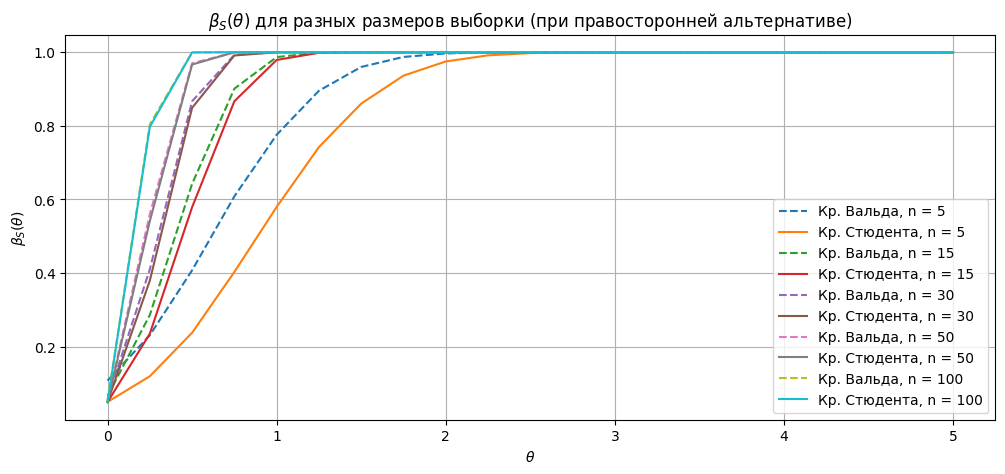

In [ ]:
plt.figure(figsize = (12, 5))

for n in norm.keys():
    plt.plot(thetas, norm[n], label = f'Кр. Вальда, n = {n}', linestyle='--')
    plt.plot(thetas, stud[n], label = f'Кр. Стюдента, n = {n}')

plt.title(r'$\beta_S (\theta)$ для разных размеров выборки (при правосторонней альтернативе)')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\beta_S (\theta)$')

plt.legend()
plt.grid()
plt.show()

**Вывод:**

Мощность асимптотического критерия растет быстрее (при отклонении фактического значения $\theta$ от нулевой гипотезы), однако это наблюдается только при небольших значениях n. С увеличением n (приблизительно от 30 и выше) зависимость мощности обоих критериев от $\theta$ становится схожей.

**3.** Пусть $n=50$. **Сравните мощности критериев**, соответствующих двусторонней, левосторонней и правосторонней альтернативам при $\theta \in (0, 5)$ по сетке с шагом 0.25.

In [ ]:
n = 50

stud = defaultdict(list)
norm = defaultdict(list)

z_ng = sps.norm.ppf(1 - alpha)
z_nl = sps.norm.ppf(alpha)
z_nt = sps.norm.ppf(1 - alpha/2)

z_tg = sps.t(df = n-1).ppf(1 - alpha)
z_tl = sps.t(df = n-1).ppf(alpha)
z_tt = sps.t(df = n-1).ppf(1 - alpha/2)

for theta in thetas:
    X = sps.norm(loc = theta).rvs(size = (sample_count, n))
    mean = X.mean(axis = 1)
    std = X.std(axis = 1)

    wg = wald_test(X, 0, mean, std, alternative = 'greater')[0]
    wl = wald_test(X, 0, mean, std, alternative = 'less')[0]
    wt = wald_test(X, 0, mean, std, alternative = 'two_sided')[0]

    norm['greater'].append(np.mean(wg > z_ng))
    norm['less'].append(np.mean(wl < z_nl))
    norm['two_sided'].append(np.mean(wt > z_nt))

    T = np.sqrt(n-1) * mean / std

    stud['greater'].append(np.mean(T > z_tg))
    stud['less'].append(np.mean(T < z_tl))
    stud['two_sided'].append(np.mean(T > z_tt))

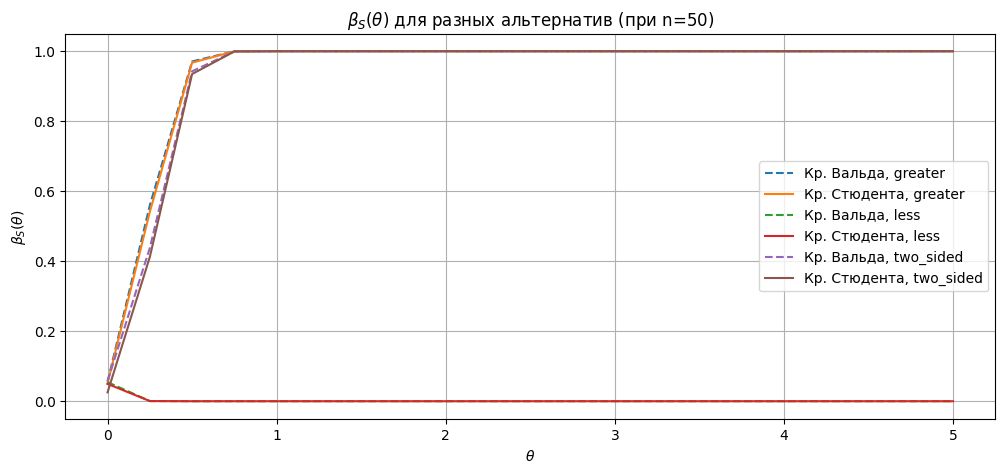

In [ ]:
plt.figure(figsize = (12, 5))

for k, n in enumerate(norm.keys()):
    plt.plot(thetas, norm[n], label = f'Кр. Вальда, {n}', linestyle = '--')
    plt.plot(thetas, stud[n], label = f'Кр. Стюдента, {n}')

plt.title(r'$\beta_S (\theta)$ для разных альтернатив (при n=50)')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\beta_S (\theta)$')

plt.legend()
plt.grid()
plt.show()

**Вывод:**

Ожидаемо, с увеличением значения $\theta$ (то есть $\theta > \theta_0$), мощность правосторонней гипотезы увеличивается наиболее быстро, а также увеличивается мощность двусторонней гипотезы. Для левосторонней гипотезы мощность практически сразу уменьшается до нуля.

В данном эксперименте поведение критериев Вальда и Стьюдента практически не отличалось.

Сделайте общий вывод по сравнению двух критериев.

**Выводы:**

1. При увеличении размера выборки до больших значений (примерно от 30 и выше) выбор между критериями становится неважным, поскольку они становятся эквивалентными. Это подтверждается как теоретическими рассуждениями, так и данными о реальном уровне значимости и мощности.

2. При небольших размерах выборки для минимизации вероятности ошибки первого рода рекомендуется использовать критерий Стьюдента, поскольку он обеспечивает приемлемый реальный уровень значимости без дополнительных коррекций.

3. Однако при небольших размерах выборки мощность асимптотического критерия может быть выше, чем у критерия Стьюдента. Тем не менее, предыдущий аспект остается более приоритетным.

4. При больших размерах выборки (например, 50) зависимость мощности обоих критериев от $\theta$ для различных альтернатив однородна.

In [ ]:
# Проверим, что моя реализация критерия Стьюдента совпадает с реализацией из scipy
X = sps.norm(loc = 1).rvs(size = 50)
n = 50
mean = X.mean()
std = X.std()
T = np.sqrt(n - 1) * mean / std
T == sps.ttest_1samp(X, 0, alternative = 'greater')[0]

True